# Lab: Probability and Information Theory in Practice

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from collections import Counter

np.random.seed(42)

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Lab environment ready!")


Lab environment ready!


# Part 1: Probability Distribution Fundamentals

## Coding Question 1.1: Discrete Probability Distribution Class

Create a `DiscretePMF` class that represents a discrete probability mass function.

P(X=3): 0.1667
E[X]: 3.5000
Var(X): 2.9167
5 samples: [1 1 6 4 5]


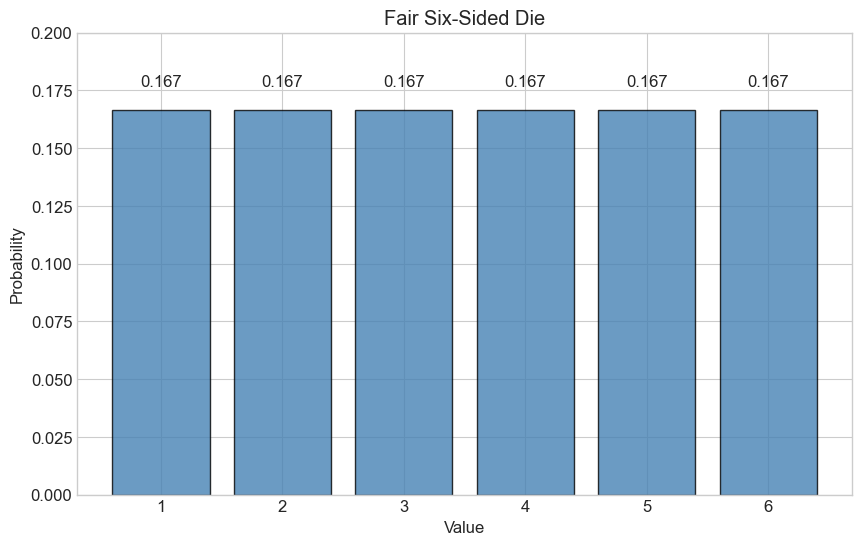

In [13]:
class DiscretePMF:
    def __init__(self, values, probabilities):
        self.values = np.array(values)
        self.probabilities = np.array(probabilities)
        
        if not np.isclose(np.sum(self.probabilities), 1.0):
            raise ValueError(f"Probabilities must sum to 1, got {np.sum(self.probabilities)}")
        if np.any(self.probabilities < 0):
            raise ValueError("Probabilities must be non-negative")
    
    def probability(self, x):
        idx = np.where(self.values == x)[0]
        return self.probabilities[idx[0]] if len(idx) > 0 else 0.0
    
    def expected_value(self):
        return np.sum(self.values * self.probabilities)
    
    def variance(self):
        mu = self.expected_value()
        return np.sum(self.probabilities * (self.values - mu) ** 2)
    
    def sample(self, n=1):
        return np.random.choice(self.values, size=n, p=self.probabilities)
    
    def plot(self, title="PMF"):
        plt.figure(figsize=(10, 6))
        plt.bar(self.values, self.probabilities, color='steelblue', edgecolor='black', alpha=0.8)
        plt.xlabel('Value')
        plt.ylabel('Probability')
        plt.title(title)
        plt.ylim(0, max(self.probabilities) * 1.2)
        for v, p in zip(self.values, self.probabilities):
            plt.text(v, p + 0.01, f'{p:.3f}', ha='center')
        plt.show()

# Test
die = DiscretePMF([1, 2, 3, 4, 5, 6], [1/6]*6)
print(f"P(X=3): {die.probability(3):.4f}")
print(f"E[X]: {die.expected_value():.4f}")
print(f"Var(X): {die.variance():.4f}")
print(f"5 samples: {die.sample(5)}")
die.plot("Fair Six-Sided Die")


<details>
<summary><strong>Click to reveal solution</strong></summary>

```python
# SOLUTION for Coding Question 1.1
class DiscretePMF:
    def __init__(self, values, probabilities):
        self.values = np.array(values)
        self.probabilities = np.array(probabilities)
        
        if not np.isclose(np.sum(self.probabilities), 1.0):
            raise ValueError(f"Probabilities must sum to 1, got {np.sum(self.probabilities)}")
        if np.any(self.probabilities < 0):
            raise ValueError("Probabilities must be non-negative")
    
    def probability(self, x):
        idx = np.where(self.values == x)[0]
        return self.probabilities[idx[0]] if len(idx) > 0 else 0.0
    
    def expected_value(self):
        return np.sum(self.values * self.probabilities)
    
    def variance(self):
        mu = self.expected_value()
        return np.sum(self.probabilities * (self.values - mu) ** 2)
    
    def sample(self, n=1):
        return np.random.choice(self.values, size=n, p=self.probabilities)
    
    def plot(self, title="PMF"):
        plt.figure(figsize=(10, 6))
        plt.bar(self.values, self.probabilities, color='steelblue', edgecolor='black', alpha=0.8)
        plt.xlabel('Value')
        plt.ylabel('Probability')
        plt.title(title)
        plt.ylim(0, max(self.probabilities) * 1.2)
        for v, p in zip(self.values, self.probabilities):
            plt.text(v, p + 0.01, f'{p:.3f}', ha='center')
        plt.show()

# Test
die = DiscretePMF([1, 2, 3, 4, 5, 6], [1/6]*6)
print(f"P(X=3): {die.probability(3):.4f}")
print(f"E[X]: {die.expected_value():.4f}")
print(f"Var(X): {die.variance():.4f}")
print(f"5 samples: {die.sample(5)}")
die.plot("Fair Six-Sided Die")

```
</details>

```
<Figure size 1000x600 with 1 Axes>

```

## Coding Question 1.2: Common Distributions

Implement functions to create common probability distributions used in deep learning.

Bernoulli(0.7):
  P(X=1) = 0.7000
  E[X] = 0.7000

Binomial(10, 0.5):
  E[X] = 5.0000


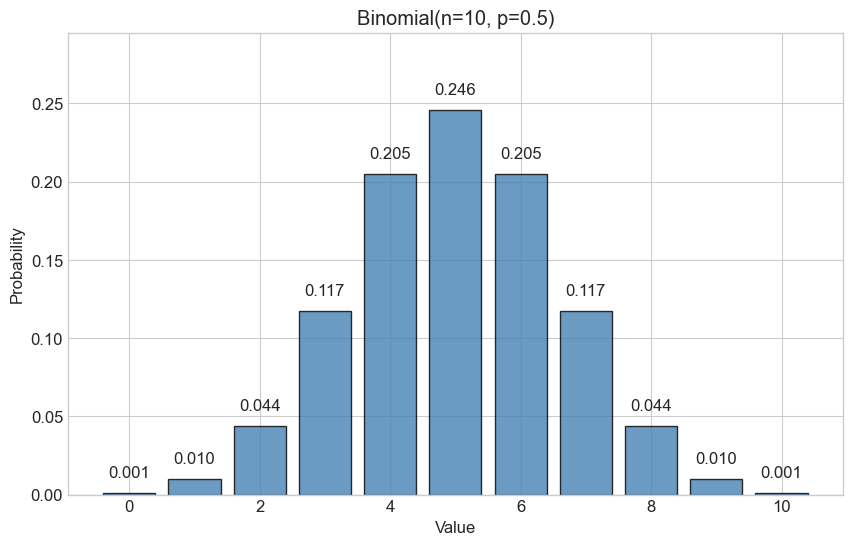

In [14]:
from math import comb

def create_bernoulli(p):
    # No error handling, just direct construction.
    return DiscretePMF([0, 1], [1-p, p])

def create_binomial(n, p):
    values = list(range(n + 1))
    probs = [comb(n, k) * (p ** k) * ((1-p) ** (n-k)) for k in values]
    return DiscretePMF(values, probs)

def create_categorical(class_probs, class_names=None):
    if class_names is None:
        class_names = list(range(len(class_probs)))
    return DiscretePMF(class_names, class_probs)

# Test
bernoulli = create_bernoulli(0.7)
print("Bernoulli(0.7):")
print(f"  P(X=1) = {bernoulli.probability(1):.4f}")
print(f"  E[X] = {bernoulli.expected_value():.4f}")

binomial = create_binomial(10, 0.5)
print("\nBinomial(10, 0.5):")
print(f"  E[X] = {binomial.expected_value():.4f}")
binomial.plot("Binomial(n=10, p=0.5)")

<details>
<summary><strong>Click to reveal solution</strong></summary>

```python
# SOLUTION for Coding Question 1.2
from math import comb

def create_bernoulli(p):
    return DiscretePMF([0, 1], [1-p, p])

def create_binomial(n, p):
    values = list(range(n + 1))
    probs = [comb(n, k) * (p ** k) * ((1-p) ** (n-k)) for k in values]
    return DiscretePMF(values, probs)

def create_categorical(class_probs, class_names=None):
    if class_names is None:
        class_names = list(range(len(class_probs)))
    return DiscretePMF(class_names, class_probs)

# Test
bernoulli = create_bernoulli(0.7)
print("Bernoulli(0.7):")
print(f"  P(X=1) = {bernoulli.probability(1):.4f}")
print(f"  E[X] = {bernoulli.expected_value():.4f}")

binomial = create_binomial(10, 0.5)
print("\nBinomial(10, 0.5):")
print(f"  E[X] = {binomial.expected_value():.4f}")
binomial.plot("Binomial(n=10, p=0.5)")

```
</details>

# Part 2: Joint and Conditional Probability

## Coding Question 2.1: Joint Probability Table

Create a class to work with joint probability distributions over two discrete variables.

P(Rainy, Umbrella): 0.45
P(Weather): [0.5 0.5]
P(Umbrella): [0.45 0.55]
P(Weather | Umbrella=Yes): [0.18181818 0.81818182]
Independent? False


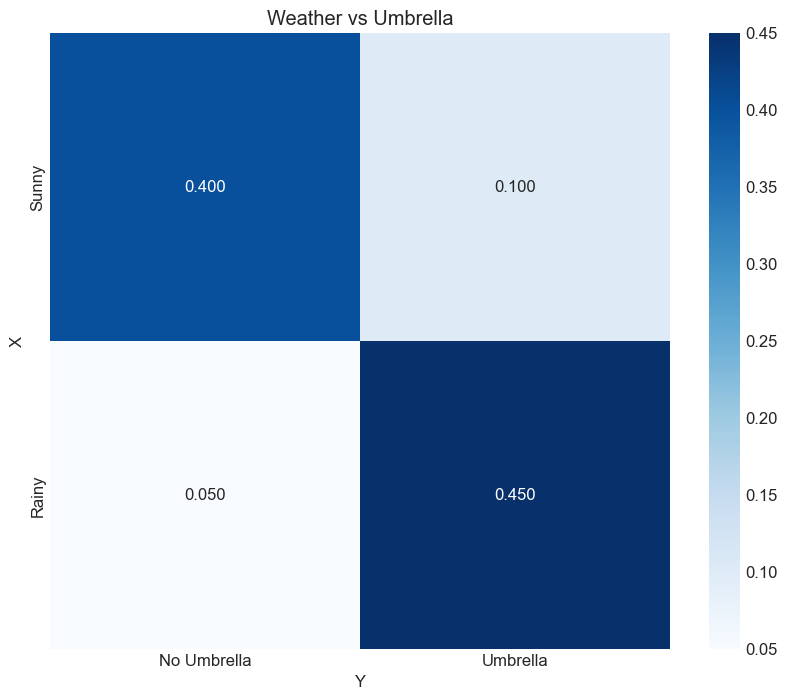

In [ ]:
class JointProbability:
    """
    Represents a joint probability distribution P(X, Y).
    """
    
    def __init__(self, joint_table, x_labels=None, y_labels=None):
        """
        Args:
            joint_table: 2D numpy array where joint_table[i,j] = P(X=i, Y=j)
            x_labels: labels for X values
            y_labels: labels for Y values
        """
        self.table = np.array(joint_table)
        self.x_labels = x_labels or list(range(self.table.shape[0]))
        self.y_labels = y_labels or list(range(self.table.shape[1]))
        
        # Validate
        if not np.isclose(np.sum(self.table), 1.0):
            raise ValueError("Joint probabilities must sum to 1")
    
    def joint(self, x_idx, y_idx):
        """Return P(X=x_idx, Y=y_idx)"""
        # TODO: Implement
        pass
    
    def marginal_x(self):
        """Return P(X) - marginal distribution of X"""
        # TODO: Sum over Y (columns)
        pass
    
    def marginal_y(self):
        """Return P(Y) - marginal distribution of Y"""
        # TODO: Sum over X (rows)
        pass
    
    def conditional_x_given_y(self, y_idx):
        """Return P(X | Y=y_idx) as an array"""
        # TODO: Implement using P(X|Y) = P(X,Y) / P(Y)
        pass
    
    def conditional_y_given_x(self, x_idx):
        """Return P(Y | X=x_idx) as an array"""
        # TODO: Implement
        pass
    
    def are_independent(self):
        """Check if X and Y are independent: P(X,Y) = P(X)P(Y)"""
        # TODO: Implement
        pass
    
    def visualize(self, title="Joint Distribution P(X,Y)"):
        """Create a heatmap visualization"""
        plt.figure(figsize=(10, 8))
        sns.heatmap(self.table, annot=True, fmt='.3f', cmap='Blues',
                    xticklabels=self.y_labels, yticklabels=self.x_labels)
        plt.xlabel('Y')
        plt.ylabel('X')
        plt.title(title)
        plt.show()

# Test with weather and umbrella example
# X: Weather (0=Sunny, 1=Rainy)
# Y: Umbrella (0=No, 1=Yes)
weather_umbrella = np.array([
    [0.40, 0.10],  # Sunny: P(No umbrella)=0.40, P(Umbrella)=0.10
    [0.05, 0.45]   # Rainy: P(No umbrella)=0.05, P(Umbrella)=0.45
])

jp = JointProbability(
    weather_umbrella,
    x_labels=['Sunny', 'Rainy'],
    y_labels=['No Umbrella', 'Umbrella']
)

print("Joint probability P(Rainy, Umbrella):", jp.joint(1, 1))
print("Marginal P(X=Weather):", jp.marginal_x())
print("Marginal P(Y=Umbrella):", jp.marginal_y())
print("P(Weather | Umbrella=Yes):", jp.conditional_x_given_y(1))
print("Are Weather and Umbrella independent?", jp.are_independent())
jp.visualize("Weather vs Umbrella")


<details>
<summary><strong>Click to reveal solution</strong></summary>

```python
# SOLUTION for Coding Question 2.1
class JointProbability:
    def __init__(self, joint_table, x_labels=None, y_labels=None):
        self.table = np.array(joint_table)
        self.x_labels = x_labels or list(range(self.table.shape[0]))
        self.y_labels = y_labels or list(range(self.table.shape[1]))
        if not np.isclose(np.sum(self.table), 1.0):
            raise ValueError("Joint probabilities must sum to 1")
    
    def joint(self, x_idx, y_idx):
        return self.table[x_idx, y_idx]
    
    def marginal_x(self):
        return np.sum(self.table, axis=1)
    
    def marginal_y(self):
        return np.sum(self.table, axis=0)
    
    def conditional_x_given_y(self, y_idx):
        p_y = self.marginal_y()[y_idx]
        return self.table[:, y_idx] / p_y if p_y > 0 else np.zeros(self.table.shape[0])
    
    def conditional_y_given_x(self, x_idx):
        p_x = self.marginal_x()[x_idx]
        return self.table[x_idx, :] / p_x if p_x > 0 else np.zeros(self.table.shape[1])
    
    def are_independent(self):
        marginal_x = self.marginal_x()
        marginal_y = self.marginal_y()
        expected = np.outer(marginal_x, marginal_y)
        return np.allclose(self.table, expected)
    
    def visualize(self, title="Joint Distribution P(X,Y)"):
        plt.figure(figsize=(10, 8))
        sns.heatmap(self.table, annot=True, fmt='.3f', cmap='Blues',
                    xticklabels=self.y_labels, yticklabels=self.x_labels)
        plt.xlabel('Y')
        plt.ylabel('X')
        plt.title(title)
        plt.show()

# Test
weather_umbrella = np.array([[0.40, 0.10], [0.05, 0.45]])
jp = JointProbability(weather_umbrella, ['Sunny', 'Rainy'], ['No Umbrella', 'Umbrella'])
print("P(Rainy, Umbrella):", jp.joint(1, 1))
print("P(Weather):", jp.marginal_x())
print("P(Umbrella):", jp.marginal_y())
print("P(Weather | Umbrella=Yes):", jp.conditional_x_given_y(1))
print("Independent?", jp.are_independent())
jp.visualize("Weather vs Umbrella")

```
</details>

# Part 3: Chain Rule Applications

## Coding Question 3.1: Language Model Probability

Implement a simple bigram language model that uses the chain rule to compute sentence probabilities.

In [ ]:
class BigramLanguageModel:
    """
    A simple bigram language model.
    
    Uses chain rule: P(w1, w2, ..., wn) = P(w1) * P(w2|w1) * P(w3|w2) * ...
    """
    
    def __init__(self):
        self.unigram_counts = Counter()
        self.bigram_counts = Counter()
        self.vocab = set()
        self.total_words = 0
    
    def train(self, sentences):
        """
        Train on a list of sentences.
        Each sentence is a list of words.
        
        TODO: Count unigrams and bigrams
        """
        for sentence in sentences:
            # Add start/end tokens
            words = ['<START>'] + sentence + ['<END>']
            
            # TODO: Update counts
            pass
    
    def unigram_prob(self, word):
        """P(word)"""
        # TODO: Implement with Laplace smoothing
        pass
    
    def bigram_prob(self, word, prev_word):
        """P(word | prev_word)"""
        # TODO: Implement with Laplace smoothing
        pass
    
    def sentence_probability(self, sentence):
        """
        Compute P(sentence) using chain rule.
        
        TODO: Implement
        """
        pass
    
    def sentence_log_probability(self, sentence):
        """
        Compute log P(sentence) for numerical stability.
        
        TODO: Implement
        """
        pass
    
    def generate(self, max_length=20):
        """
        Generate a sentence by sampling.
        
        TODO: Implement autoregressive generation
        """
        pass

# Training data
training_sentences = [
    ['the', 'cat', 'sat', 'on', 'the', 'mat'],
    ['the', 'dog', 'sat', 'on', 'the', 'floor'],
    ['the', 'cat', 'chased', 'the', 'dog'],
    ['the', 'dog', 'chased', 'the', 'cat'],
    ['a', 'cat', 'is', 'on', 'the', 'mat'],
    ['the', 'cat', 'is', 'happy'],
    ['the', 'dog', 'is', 'happy'],
]

lm = BigramLanguageModel()
lm.train(training_sentences)

# Test
test_sentences = [
    ['the', 'cat', 'sat'],
    ['the', 'dog', 'is', 'happy'],
    ['banana', 'quantum', 'flux'],  # Should have low probability
]

for sent in test_sentences:
    log_prob = lm.sentence_log_probability(sent)
    print(f"'{' '.join(sent)}': log P = {log_prob:.4f}")

print("\nGenerated sentences:")
for _ in range(3):
    print(f"  {' '.join(lm.generate())}")


'the cat sat': log P = -7.5237
'the dog is happy': log P = -8.0419
'banana quantum flux': log P = -10.6906

Generated sentences:
  the mat is floor floor floor cat chased cat sat dog floor cat sat cat is floor dog chased the
  sat on the mat mat is a on dog happy on cat the mat a chased floor dog chased the
  mat


<details>
<summary><strong>Click to reveal solution</strong></summary>

```python
# SOLUTION for Coding Question 3.1
class BigramLanguageModel:
    def __init__(self):
        self.unigram_counts = Counter()
        self.bigram_counts = Counter()
        self.vocab = set()
        self.total_words = 0
    
    def train(self, sentences):
        for sentence in sentences:
            words = ['<START>'] + sentence + ['<END>']
            for i, word in enumerate(words):
                self.vocab.add(word)
                self.unigram_counts[word] += 1
                self.total_words += 1
                if i > 0:
                    self.bigram_counts[(words[i-1], word)] += 1
    
    def unigram_prob(self, word):
        # Laplace smoothing
        return (self.unigram_counts[word] + 1) / (self.total_words + len(self.vocab))
    
    def bigram_prob(self, word, prev_word):
        # Laplace smoothing
        bigram_count = self.bigram_counts[(prev_word, word)]
        prev_count = self.unigram_counts[prev_word]
        return (bigram_count + 1) / (prev_count + len(self.vocab))
    
    def sentence_probability(self, sentence):
        words = ['<START>'] + sentence + ['<END>']
        prob = 1.0
        for i in range(1, len(words)):
            prob *= self.bigram_prob(words[i], words[i-1])
        return prob
    
    def sentence_log_probability(self, sentence):
        words = ['<START>'] + sentence + ['<END>']
        log_prob = 0.0
        for i in range(1, len(words)):
            log_prob += np.log(self.bigram_prob(words[i], words[i-1]))
        return log_prob
    
    def generate(self, max_length=20):
        sentence = []
        prev_word = '<START>'
        for _ in range(max_length):
            # Get distribution over next words
            next_probs = {}
            for word in self.vocab:
                next_probs[word] = self.bigram_prob(word, prev_word)
            # Normalize
            total = sum(next_probs.values())
            words = list(next_probs.keys())
            probs = [next_probs[w] / total for w in words]
            # Sample
            next_word = np.random.choice(words, p=probs)
            if next_word == '<END>':
                break
            if next_word != '<START>':
                sentence.append(next_word)
            prev_word = next_word
        return sentence if sentence else ['<empty>']

# Test
lm = BigramLanguageModel()
lm.train(training_sentences)

for sent in test_sentences:
    log_prob = lm.sentence_log_probability(sent)
    print(f"'{' '.join(sent)}': log P = {log_prob:.4f}")

print("\nGenerated sentences:")
for _ in range(3):
    print(f"  {' '.join(lm.generate())}")

```
</details>

# Part 4: Naive Bayes Classifier

## Coding Question 4.1: Build a Spam Classifier

Implement a Naive Bayes text classifier from scratch.

In [22]:
class NaiveBayesClassifier:
    """
    Naive Bayes Classifier for text classification.
    
    Uses Bayes' Rule: P(class|features) ∝ P(features|class) * P(class)
    Naive assumption: P(features|class) = ∏ P(feature_i|class)
    """
    
    def __init__(self, alpha=1.0):
        """
        Args:
            alpha: Laplace smoothing parameter
        """
        self.alpha = alpha
        self.class_priors = {}
        self.feature_likelihoods = {}
        self.vocab = set()
        self.classes = []
    
    def fit(self, X, y):
        """
        Train the classifier.
        
        Args:
            X: list of documents (each document is a list of words)
            y: list of class labels
        
        TODO: Compute class priors P(class) and feature likelihoods P(word|class)
        """
        pass
    
    def predict_proba(self, document):
        """
        Predict class probabilities for a document.
        
        Args:
            document: list of words
        
        Returns:
            dict: {class: probability}
        
        TODO: Use log probabilities for numerical stability
        """
        pass
    
    def predict(self, document):
        """Predict the most likely class"""
        probs = self.predict_proba(document)
        return max(probs, key=probs.get)
    
    def evaluate(self, X_test, y_test):
        """Calculate accuracy on test set"""
        correct = sum(1 for doc, label in zip(X_test, y_test) if self.predict(doc) == label)
        return correct / len(y_test)

# Training data
spam_emails = [
    ['free', 'money', 'click', 'now', 'winner'],
    ['congratulations', 'you', 'won', 'prize', 'claim', 'now'],
    ['free', 'offer', 'limited', 'time', 'click'],
    ['winner', 'lottery', 'claim', 'your', 'prize'],
    ['free', 'free', 'free', 'money', 'now'],
    ['urgent', 'action', 'required', 'click', 'link'],
]

ham_emails = [
    ['meeting', 'tomorrow', 'at', 'office', 'please', 'confirm'],
    ['project', 'update', 'attached', 'please', 'review'],
    ['hello', 'how', 'are', 'you', 'doing', 'today'],
    ['dinner', 'tonight', 'at', 'seven', 'please', 'confirm'],
    ['report', 'due', 'friday', 'please', 'submit'],
    ['thank', 'you', 'for', 'your', 'help', 'today'],
]

X_train = spam_emails + ham_emails
y_train = ['spam'] * len(spam_emails) + ['ham'] * len(ham_emails)

# Test data
X_test = [
    ['free', 'money', 'winner'],           # Likely spam
    ['meeting', 'tomorrow', 'confirm'],    # Likely ham
    ['click', 'now', 'urgent'],            # Likely spam
    ['thank', 'you', 'help'],              # Likely ham
]
y_test = ['spam', 'ham', 'spam', 'ham']

# Train and evaluate
nb = NaiveBayesClassifier(alpha=1.0)
nb.fit(X_train, y_train)

print("Predictions:")
for doc, true_label in zip(X_test, y_test):
    pred = nb.predict(doc)
    probs = nb.predict_proba(doc)
    print(f"  '{' '.join(doc[:3])}...' -> {pred} (true: {true_label})")
    print(f"    P(spam)={probs.get('spam', 0):.4f}, P(ham)={probs.get('ham', 0):.4f}")

print(f"\nAccuracy: {nb.evaluate(X_test, y_test):.2%}")


Predictions:
  'free money winner...' -> spam (true: spam)
    P(spam)=0.9838, P(ham)=0.0162
  'meeting tomorrow confirm...' -> ham (true: ham)
    P(spam)=0.0857, P(ham)=0.9143
  'click now urgent...' -> spam (true: spam)
    P(spam)=0.9730, P(ham)=0.0270
  'thank you help...' -> ham (true: ham)
    P(spam)=0.1579, P(ham)=0.8421

Accuracy: 100.00%


<details>
<summary><strong>Click to reveal solution</strong></summary>

```python
# SOLUTION for Coding Question 4.1
class NaiveBayesClassifier:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.class_priors = {}
        self.word_counts = {}
        self.class_word_totals = {}
        self.vocab = set()
        self.classes = []
    
    def fit(self, X, y):
        self.classes = list(set(y))
        
        # Build vocabulary
        for doc in X:
            self.vocab.update(doc)
        
        # Count class occurrences and word occurrences per class
        class_counts = Counter(y)
        self.word_counts = {c: Counter() for c in self.classes}
        self.class_word_totals = {c: 0 for c in self.classes}
        
        for doc, label in zip(X, y):
            for word in doc:
                self.word_counts[label][word] += 1
                self.class_word_totals[label] += 1
        
        # Compute priors
        total_docs = len(y)
        self.class_priors = {c: count / total_docs for c, count in class_counts.items()}
    
    def predict_proba(self, document):
        log_probs = {}
        vocab_size = len(self.vocab)
        
        for c in self.classes:
            # Start with log prior
            log_prob = np.log(self.class_priors[c])
            
            # Add log likelihoods
            for word in document:
                word_count = self.word_counts[c][word]
                # Laplace smoothing: P(word|class) = (count + alpha) / (total + alpha * vocab_size)
                likelihood = (word_count + self.alpha) / (self.class_word_totals[c] + self.alpha * vocab_size)
                log_prob += np.log(likelihood)
            
            log_probs[c] = log_prob
        
        # Convert to probabilities (normalize)
        max_log = max(log_probs.values())
        probs = {c: np.exp(lp - max_log) for c, lp in log_probs.items()}
        total = sum(probs.values())
        return {c: p / total for c, p in probs.items()}
    
    def predict(self, document):
        probs = self.predict_proba(document)
        return max(probs, key=probs.get)
    
    def evaluate(self, X_test, y_test):
        correct = sum(1 for doc, label in zip(X_test, y_test) if self.predict(doc) == label)
        return correct / len(y_test)

# Training data
spam_emails = [
    ['free', 'money', 'click', 'now', 'winner'],
    ['congratulations', 'you', 'won', 'prize', 'claim', 'now'],
    ['free', 'offer', 'limited', 'time', 'click'],
    ['winner', 'lottery', 'claim', 'your', 'prize'],
    ['free', 'free', 'free', 'money', 'now'],
    ['urgent', 'action', 'required', 'click', 'link'],
]

ham_emails = [
    ['meeting', 'tomorrow', 'at', 'office', 'please', 'confirm'],
    ['project', 'update', 'attached', 'please', 'review'],
    ['hello', 'how', 'are', 'you', 'doing', 'today'],
    ['dinner', 'tonight', 'at', 'seven', 'please', 'confirm'],
    ['report', 'due', 'friday', 'please', 'submit'],
    ['thank', 'you', 'for', 'your', 'help', 'today'],
]

X_train = spam_emails + ham_emails
y_train = ['spam'] * len(spam_emails) + ['ham'] * len(ham_emails)

# Test data
X_test = [
    ['free', 'money', 'winner'],           # Likely spam
    ['meeting', 'tomorrow', 'confirm'],    # Likely ham
    ['click', 'now', 'urgent'],            # Likely spam
    ['thank', 'you', 'help'],              # Likely ham
]
y_test = ['spam', 'ham', 'spam', 'ham']

# Train and evaluate
nb = NaiveBayesClassifier(alpha=1.0)
nb.fit(X_train, y_train)

print("Predictions:")
for doc, true_label in zip(X_test, y_test):
    pred = nb.predict(doc)
    probs = nb.predict_proba(doc)
    print(f"  '{' '.join(doc[:3])}...' -> {pred} (true: {true_label})")
    print(f"    P(spam)={probs.get('spam', 0):.4f}, P(ham)={probs.get('ham', 0):.4f}")

print(f"\nAccuracy: {nb.evaluate(X_test, y_test):.2%}")

```
<details\>

# LAB PUZZLE QUIZZES

## Puzzle 1: Distribution Detective
You observe the following samples from an unknown distribution: `[1, 1, 1, 2, 2, 3, 1, 1, 2, 1]`

What is the Maximum Likelihood Estimate (MLE) for P(X=1)?

<details>
<summary> Solution</summary>

MLE counts the frequency:
- X=1 appears 6 times out of 10
- P(X=1) = 6/10 = 0.6
</details>

---

## Puzzle 2: Conditional Probability Trap
Given:
- P(A) = 0.3
- P(B|A) = 0.8
- P(B|not A) = 0.2

What is P(A|B)?

<details>
<summary> Solution</summary>

Using Bayes' Rule:
1. P(B) = P(B|A)P(A) + P(B|not A)P(not A) = 0.8×0.3 + 0.2×0.7 = 0.24 + 0.14 = 0.38
2. P(A|B) = P(B|A)P(A) / P(B) = (0.8 × 0.3) / 0.38 = 0.24 / 0.38 ≈ 0.632
</details>

---

## Puzzle 3: Chain Rule Challenge
A sentence has 4 words. If each word depends only on the previous word (bigram model), how many conditional probability terms do you need to compute the sentence probability?

<details>
<summary> Solution</summary>

P(w1, w2, w3, w4) = P(w1|START) × P(w2|w1) × P(w3|w2) × P(w4|w3)

You need **4 conditional probability terms** (plus the implicit P(END|w4) if you include the end token).
</details>

---

## Puzzle 4: Independence Verification
Given the joint distribution:

| | Y=0 | Y=1 |
|--------|------|------|
| X=0 | 0.2 | 0.3 |
| X=1 | 0.2 | 0.3 |

Are X and Y independent?

<details>
<summary> Solution</summary>

Yes, X and Y are independent!

Check: P(X,Y) = P(X) × P(Y)?
- P(X=0) = 0.5, P(X=1) = 0.5
- P(Y=0) = 0.4, P(Y=1) = 0.6
- P(X=0)×P(Y=0) = 0.5×0.4 = 0.2
- P(X=0)×P(Y=1) = 0.5×0.6 = 0.3
- All entries match!
</details>

- Computing entropy for various distributions
- Visualizing the entropy function
- Maximum entropy principle

# Part 5: Entropy and Information

## Coding Question 1.1: Entropy Calculator

Implement a comprehensive entropy calculator that handles edge cases.

In [ ]:
def entropy(p, base=2):
    """
    Compute entropy of a probability distribution.
    
    Args:
        p: array-like, probability distribution
        base: logarithm base (2 for bits, e for nats)
    
    Returns:
        float: entropy value
    
    TODO: Handle edge cases (zeros, normalization)
    """
    # YOUR CODE HERE
    pass

def self_information(prob, base=2):
    """
    Compute self-information (surprisal) of an event.
    
    I(x) = -log P(x)
    
    TODO: Implement
    """
    # YOUR CODE HERE
    pass

# Test cases
distributions = {
    'Fair coin': [0.5, 0.5],
    'Biased coin (90-10)': [0.9, 0.1],
    'Certain': [1.0, 0.0],
    'Fair die': [1/6] * 6,
    'Uniform 8': [1/8] * 8,
}

print("Entropy values (in bits):")
for name, p in distributions.items():
    h = entropy(p)
    print(f"  {name}: {h:.4f} bits")

print("\nSelf-information examples:")
print(f"  Rare event (p=0.01): {self_information(0.01):.2f} bits")
print(f"  Common event (p=0.99): {self_information(0.99):.4f} bits")


Entropy values (in bits):
  Uniform(2): 1.0000 bits
  Biased coin: 0.4690 bits
  Three fair: 1.5850 bits
  All mass at one: -0.0000 bits

Self-information examples:
  Rare event (p=0.01): 6.64 bits
  Common event (p=0.99): 0.0145 bits


<details>
<summary><strong>Click to reveal solution</strong></summary>

```python
# SOLUTION
def entropy(p, base=2):
    p = np.array(p, dtype=float)
    # Remove zeros to avoid log(0)
    p = p[p > 0]
    if len(p) == 0:
        return 0.0
    # Normalize if needed
    p = p / p.sum()
    if base == 2:
        return -np.sum(p * np.log2(p))
    else:
        return -np.sum(p * np.log(p))

def self_information(prob, base=2):
    if prob <= 0:
        return float('inf')
    if base == 2:
        return -np.log2(prob)
    return -np.log(prob)

# Example distributions for testing (to resolve 'distributions not defined' error)
distributions = {
    "Uniform(2)": [0.5, 0.5],
    "Biased coin": [0.9, 0.1],
    "Three fair": [1/3, 1/3, 1/3],
    "All mass at one": [1.0, 0.0, 0.0]
}

print("Entropy values (in bits):")
for name, p in distributions.items():
    h = entropy(p)
    print(f"  {name}: {h:.4f} bits")

print("\nSelf-information examples:")
print(f"  Rare event (p=0.01): {self_information(0.01):.2f} bits")
print(f"  Common event (p=0.99): {self_information(0.99):.4f} bits")

```
</details>

## Coding Question 1.2: Visualize Binary Entropy

Create a visualization showing how entropy changes for a binary distribution.

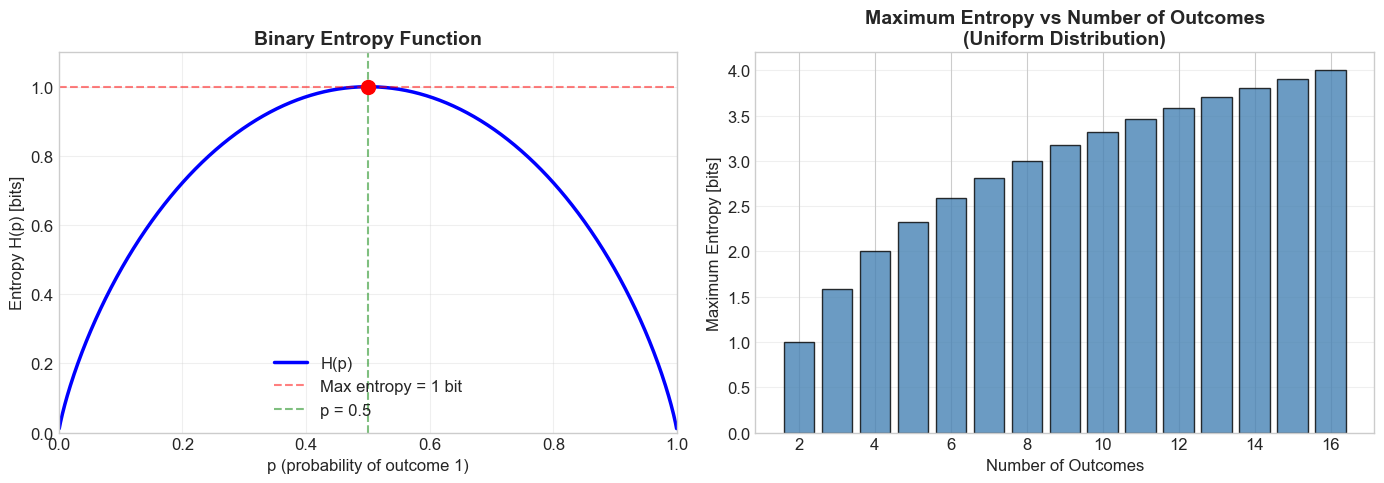

In [ ]:
def plot_binary_entropy():
    """
    Plot the binary entropy function H(p) = -p*log(p) - (1-p)*log(1-p)
    
    TODO: Create visualization showing:
    1. Binary entropy curve
    2. Mark maximum entropy point
    3. Add annotations explaining the curve
    """
    # YOUR CODE HERE
    pass

plot_binary_entropy()


<details>
<summary><strong>Click to reveal solution</strong></summary>

```python
# SOLUTION
def plot_binary_entropy():
    p = np.linspace(0.001, 0.999, 1000)
    h = -p * np.log2(p) - (1-p) * np.log2(1-p)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Binary entropy curve
    ax1 = axes[0]
    ax1.plot(p, h, 'b-', linewidth=2.5, label='H(p)')
    ax1.axhline(y=1, color='r', linestyle='--', alpha=0.5, label='Max entropy = 1 bit')
    ax1.axvline(x=0.5, color='g', linestyle='--', alpha=0.5, label='p = 0.5')
    ax1.scatter([0.5], [1], color='red', s=100, zorder=5)
    ax1.set_xlabel('p (probability of outcome 1)', fontsize=12)
    ax1.set_ylabel('Entropy H(p) [bits]', fontsize=12)
    ax1.set_title('Binary Entropy Function', fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1.1)
    
    # Entropy for different number of outcomes
    ax2 = axes[1]
    n_outcomes = range(2, 17)
    max_entropies = [np.log2(n) for n in n_outcomes]
    ax2.bar(n_outcomes, max_entropies, color='steelblue', edgecolor='black', alpha=0.8)
    ax2.set_xlabel('Number of Outcomes', fontsize=12)
    ax2.set_ylabel('Maximum Entropy [bits]', fontsize=12)
    ax2.set_title('Maximum Entropy vs Number of Outcomes\n(Uniform Distribution)', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

plot_binary_entropy()

```
</details>

# Part 2: Cross-Entropy Loss

## Coding Question 2.1: Implement Cross-Entropy Loss

Build cross-entropy loss from scratch and compare with PyTorch/NumPy implementations.

In [ ]:
def cross_entropy_loss(y_true, y_pred, epsilon=1e-15):
    """
    Compute cross-entropy loss between true labels and predictions.
    
    Args:
        y_true: one-hot encoded true labels (N, C) or class indices (N,)
        y_pred: predicted probabilities (N, C)
        epsilon: small value for numerical stability
    
    Returns:
        float: mean cross-entropy loss
    
    TODO: Implement for both one-hot and index labels
    """
    # YOUR CODE HERE
    pass

def softmax(logits):
    """Convert logits to probabilities"""
    # YOUR CODE HERE
    pass

def cross_entropy_with_logits(y_true, logits):
    """
    Numerically stable cross-entropy from logits.
    
    TODO: Implement without explicitly computing softmax
    Hint: Use log-sum-exp trick
    """
    # YOUR CODE HERE
    pass

# Test
y_true_onehot = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0],
])

y_pred = np.array([
    [0.7, 0.2, 0.1],  # Correct, confident
    [0.3, 0.5, 0.2],  # Correct, less confident
    [0.1, 0.2, 0.7],  # Correct, confident
    [0.1, 0.8, 0.1],  # Wrong prediction
])

loss = cross_entropy_loss(y_true_onehot, y_pred)
print(f"Cross-entropy loss: {loss:.4f}")

# Test individual samples
for i in range(len(y_true_onehot)):
    sample_loss = cross_entropy_loss(y_true_onehot[i:i+1], y_pred[i:i+1])
    true_class = np.argmax(y_true_onehot[i])
    pred_class = np.argmax(y_pred[i])
    print(f"  Sample {i}: true={true_class}, pred={pred_class}, loss={sample_loss:.4f}")


Cross-entropy loss: 0.9273
  Sample 0: true=0, pred=0, loss=0.3567
  Sample 1: true=1, pred=1, loss=0.6931
  Sample 2: true=2, pred=2, loss=0.3567
  Sample 3: true=0, pred=1, loss=2.3026


<details>
<summary><strong>Click to reveal solution</strong></summary>

```python
# SOLUTION
def cross_entropy_loss(y_true, y_pred, epsilon=1e-15):
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Handle 1D case
    if y_true.ndim == 1 and y_pred.ndim == 1:
        y_true = y_true.reshape(1, -1)
        y_pred = y_pred.reshape(1, -1)
    
    # Compute cross-entropy: -sum(y_true * log(y_pred))
    ce = -np.sum(y_true * np.log(y_pred), axis=-1)
    return np.mean(ce)

def softmax(logits):
    shifted = logits - np.max(logits, axis=-1, keepdims=True)
    exp_vals = np.exp(shifted)
    return exp_vals / np.sum(exp_vals, axis=-1, keepdims=True)

def cross_entropy_with_logits(y_true, logits):
    # Log-sum-exp trick for stability
    max_logits = np.max(logits, axis=-1, keepdims=True)
    log_sum_exp = max_logits + np.log(np.sum(np.exp(logits - max_logits), axis=-1, keepdims=True))
    log_probs = logits - log_sum_exp
    ce = -np.sum(y_true * log_probs, axis=-1)
    return np.mean(ce)

# Test
y_true_onehot = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0],
])

y_pred = np.array([
    [0.7, 0.2, 0.1],  # Correct, confident
    [0.3, 0.5, 0.2],  # Correct, less confident
    [0.1, 0.2, 0.7],  # Correct, confident
    [0.1, 0.8, 0.1],  # Wrong prediction
])

loss = cross_entropy_loss(y_true_onehot, y_pred)
print(f"Cross-entropy loss: {loss:.4f}")

# Test individual samples
for i in range(len(y_true_onehot)):
    sample_loss = cross_entropy_loss(y_true_onehot[i:i+1], y_pred[i:i+1])
    true_class = np.argmax(y_true_onehot[i])
    pred_class = np.argmax(y_pred[i])
    print(f"  Sample {i}: true={true_class}, pred={pred_class}, loss={sample_loss:.4f}")

```
</details>

# Part 6: KL Divergence

## Coding Question 6.1: KL Divergence Implementation

KL Divergence Asymmetry Demo:
  P = [0.9 0.1] (peaked)
  Q = [0.5 0.5] (uniform)
  KL(P || Q) = 0.3681
  KL(Q || P) = 0.5108
  -> NOT symmetric!


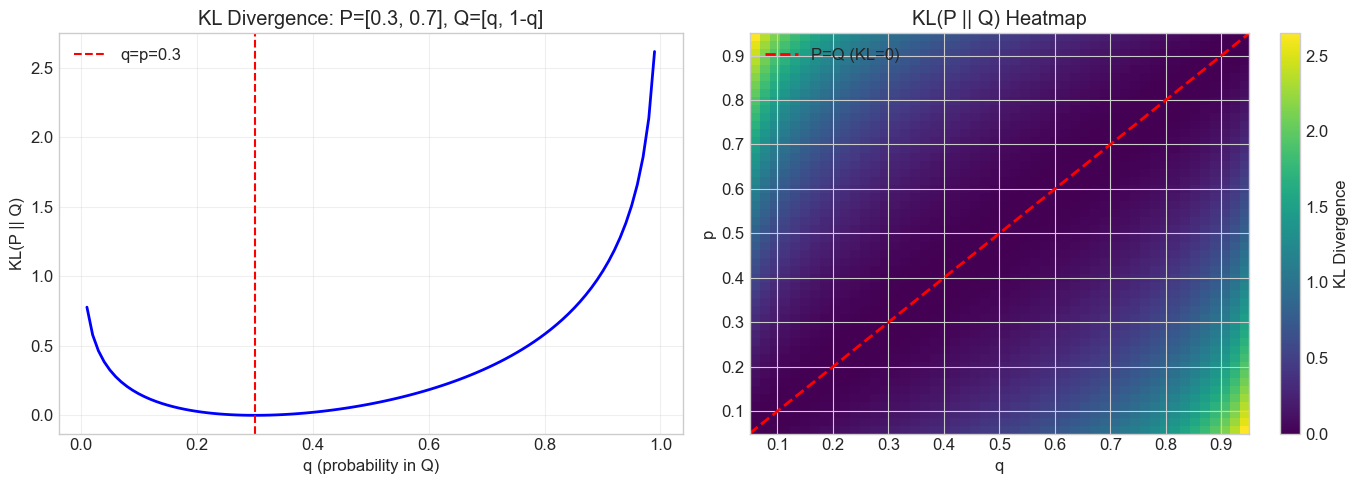

In [29]:
# KL Divergence Implementation and Visualization
def kl_divergence(p, q, epsilon=1e-15):
    """Compute KL(P || Q)"""
    p = np.array(p, dtype=float)
    q = np.array(q, dtype=float)
    p = np.clip(p, epsilon, 1)
    q = np.clip(q, epsilon, 1)
    return np.sum(p * np.log(p / q))

# Demonstrate asymmetry
p = np.array([0.9, 0.1])  # Peaked distribution
q = np.array([0.5, 0.5])  # Uniform distribution

print("KL Divergence Asymmetry Demo:")
print(f"  P = {p} (peaked)")
print(f"  Q = {q} (uniform)")
print(f"  KL(P || Q) = {kl_divergence(p, q):.4f}")
print(f"  KL(Q || P) = {kl_divergence(q, p):.4f}")
print("  -> NOT symmetric!")

# Visualize KL divergence surface
def visualize_kl():
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # KL as function of Q given fixed P
    ax1 = axes[0]
    q_vals = np.linspace(0.01, 0.99, 100)
    p_fixed = 0.3
    kl_vals = [kl_divergence([p_fixed, 1-p_fixed], [q, 1-q]) for q in q_vals]
    ax1.plot(q_vals, kl_vals, 'b-', linewidth=2)
    ax1.axvline(x=p_fixed, color='r', linestyle='--', label=f'q=p={p_fixed}')
    ax1.set_xlabel('q (probability in Q)')
    ax1.set_ylabel('KL(P || Q)')
    ax1.set_title(f'KL Divergence: P=[{p_fixed}, {1-p_fixed}], Q=[q, 1-q]')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Heatmap of KL(P||Q)
    ax2 = axes[1]
    p_range = np.linspace(0.05, 0.95, 50)
    q_range = np.linspace(0.05, 0.95, 50)
    kl_matrix = np.zeros((len(p_range), len(q_range)))
    for i, p_val in enumerate(p_range):
        for j, q_val in enumerate(q_range):
            kl_matrix[i, j] = kl_divergence([p_val, 1-p_val], [q_val, 1-q_val])
    
    im = ax2.imshow(kl_matrix, origin='lower', aspect='auto',
                    extent=[0.05, 0.95, 0.05, 0.95], cmap='viridis')
    ax2.plot([0.05, 0.95], [0.05, 0.95], 'r--', linewidth=2, label='P=Q (KL=0)')
    ax2.set_xlabel('q')
    ax2.set_ylabel('p')
    ax2.set_title('KL(P || Q) Heatmap')
    ax2.legend()
    plt.colorbar(im, ax=ax2, label='KL Divergence')
    
    plt.tight_layout()
    plt.show()

visualize_kl()


# Part 7: Bayesian Inference

## Coding Question 7.1: Medical Diagnosis Simulator

RARE DISEASE SCENARIO
Prevalence: 0.10%
Test Sensitivity: 99.00%
Test Specificity: 95.00%

If test is POSITIVE: P(disease) = 1.94%
If test is NEGATIVE: P(disease) = 0.0011%

Note: Even with a positive test result, the probability is only approximately 2% that the patient has the disease.


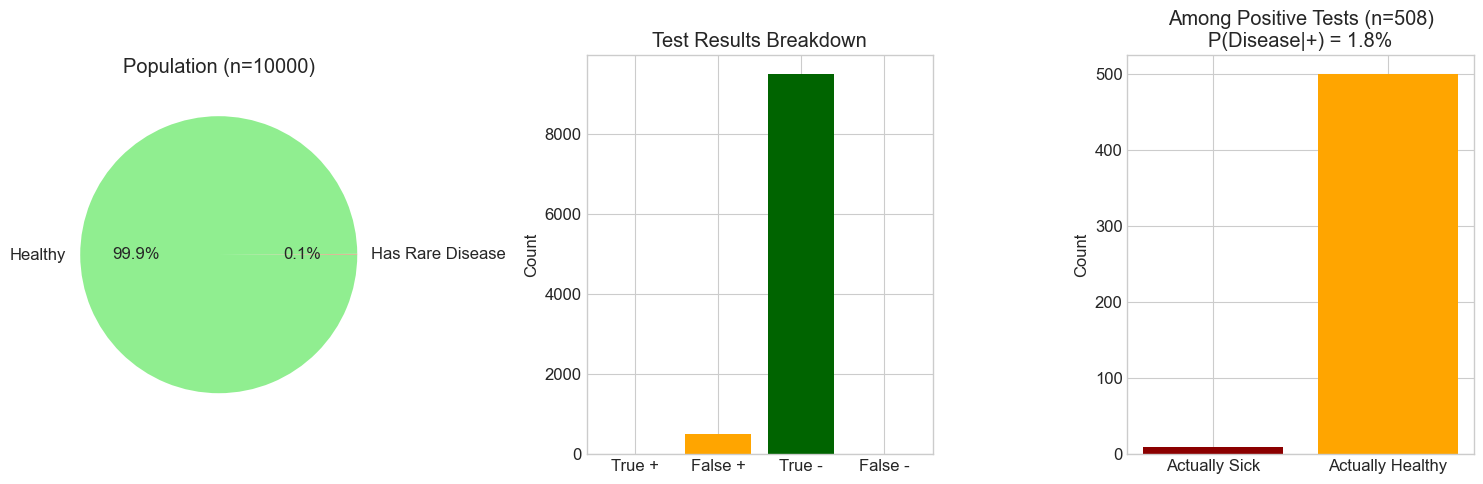

{'true_positives': 9,
 'false_positives': 499,
 'true_negatives': 9491,
 'false_negatives': 1,
 'posterior_given_positive': 0.017716535433070866}

In [30]:
class BayesianDiagnostic:
    """
    A Bayesian medical diagnostic system.
    Demonstrates how prior knowledge affects diagnosis.
    """
    
    def __init__(self, disease_name, prevalence, sensitivity, specificity):
        """
        Args:
            disease_name: Name of disease
            prevalence: P(disease) - prior probability
            sensitivity: P(positive | disease) - true positive rate
            specificity: P(negative | healthy) - true negative rate
        """
        self.disease_name = disease_name
        self.prior = prevalence
        self.sensitivity = sensitivity
        self.specificity = specificity
        self.false_positive_rate = 1 - specificity
    
    def diagnose(self, test_positive):
        """
        Compute P(disease | test result) using Bayes' rule.
        """
        if test_positive:
            # P(positive) = P(positive|disease)P(disease) + P(positive|healthy)P(healthy)
            p_positive = (self.sensitivity * self.prior + 
                         self.false_positive_rate * (1 - self.prior))
            # P(disease | positive)
            posterior = (self.sensitivity * self.prior) / p_positive
        else:
            # P(negative)
            p_negative = ((1 - self.sensitivity) * self.prior + 
                         self.specificity * (1 - self.prior))
            # P(disease | negative)
            posterior = ((1 - self.sensitivity) * self.prior) / p_negative
        
        return posterior
    
    def visualize_population(self, n=10000):
        """Visualize how tests affect a population."""
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        # Population breakdown
        n_sick = int(n * self.prior)
        n_healthy = n - n_sick
        
        # Test results
        true_positives = int(n_sick * self.sensitivity)
        false_negatives = n_sick - true_positives
        false_positives = int(n_healthy * self.false_positive_rate)
        true_negatives = n_healthy - false_positives
        
        # Pie chart: Population
        ax1 = axes[0]
        ax1.pie([n_sick, n_healthy], labels=[f'Has {self.disease_name}', 'Healthy'],
                colors=['salmon', 'lightgreen'], autopct='%1.1f%%')
        ax1.set_title(f'Population (n={n})')
        
        # Bar chart: Test results
        ax2 = axes[1]
        categories = ['True +', 'False +', 'True -', 'False -']
        values = [true_positives, false_positives, true_negatives, false_negatives]
        colors = ['darkred', 'orange', 'darkgreen', 'lightcoral']
        ax2.bar(categories, values, color=colors)
        ax2.set_ylabel('Count')
        ax2.set_title('Test Results Breakdown')
        
        # Posterior given positive test
        ax3 = axes[2]
        all_positives = true_positives + false_positives
        posterior = true_positives / all_positives if all_positives > 0 else 0
        ax3.bar(['Actually Sick', 'Actually Healthy'], 
               [true_positives, false_positives],
               color=['darkred', 'orange'])
        ax3.set_ylabel('Count')
        ax3.set_title(f'Among Positive Tests (n={all_positives})\nP(Disease|+) = {posterior:.1%}')
        
        plt.tight_layout()
        plt.show()
        
        return {
            'true_positives': true_positives,
            'false_positives': false_positives,
            'true_negatives': true_negatives,
            'false_negatives': false_negatives,
            'posterior_given_positive': posterior
        }

# Example: Rare disease with good test
rare_disease = BayesianDiagnostic(
    disease_name="Rare Disease",
    prevalence=0.001,  # 0.1% prevalence
    sensitivity=0.99,   # 99% sensitivity
    specificity=0.95    # 95% specificity
)

print("=" * 50)
print("RARE DISEASE SCENARIO")
print("=" * 50)
print(f"Prevalence: {rare_disease.prior:.2%}")
print(f"Test Sensitivity: {rare_disease.sensitivity:.2%}")
print(f"Test Specificity: {rare_disease.specificity:.2%}")
print()

posterior_positive = rare_disease.diagnose(test_positive=True)
posterior_negative = rare_disease.diagnose(test_positive=False)

print(f"If test is POSITIVE: P(disease) = {posterior_positive:.2%}")
print(f"If test is NEGATIVE: P(disease) = {posterior_negative:.4%}")
print()
print("Note: Even with a positive test result, the probability is only approximately 2% that the patient has the disease.")

rare_disease.visualize_population()


# LAB PUZZLE QUIZZES

## Puzzle 1: Entropy Comparison
Which has higher entropy: A password system where users pick from 1000 possible passwords uniformly, or one where 90% pick "password123" and 10% choose randomly from 999 others?

<details>
<summary> Solution</summary>

Uniform distribution has higher entropy!
- Uniform: H = log₂(1000) ≈ 9.97 bits
- Non-uniform: H = -0.9×log₂(0.9) - 0.1×(-log₂(999)) ≈ 0.47 + 0.33 ≈ 0.8 bits

The predictable system is much easier to crack!
</details>

---

## Puzzle 2: Cross-Entropy Minimum
For a 3-class classification, if the true label is class 0, what predicted distribution minimizes cross-entropy?

<details>
<summary> Solution</summary>

The distribution [1, 0, 0] minimizes cross-entropy to 0.
- H([1,0,0], [1,0,0]) = -1×log(1) - 0×log(0) - 0×log(0) = 0

Any other distribution will have higher cross-entropy.
</details>

---

## Puzzle 3: KL Direction Matters
You're training a generative model. Should you minimize KL(P_data || P_model) or KL(P_model || P_data)?

<details>
<summary> Solution</summary>

Minimize **KL(P_data || P_model)** (typical ML training)
- This penalizes the model for assigning low probability to data points
- Ensures model covers all modes of the data
- KL(P_model || P_data) would allow model to collapse to subset of data
</details>

---

## Puzzle 4: Bayes Update Chain
A patient tests positive on Test A (sensitivity 90%, specificity 80%). They then test positive on independent Test B (sensitivity 95%, specificity 90%). If disease prevalence is 1%, what's the final posterior?

<details>
<summary> Solution</summary>

Sequential Bayes updates:
1. After Test A: P(D|A+) = (0.9×0.01)/(0.9×0.01 + 0.2×0.99) ≈ 4.3%
2. Use this as new prior for Test B
3. After Test B: P(D|A+,B+) = (0.95×0.043)/(0.95×0.043 + 0.1×0.957) ≈ 30%

Two positive tests raise probability significantly from 1% to 30%!
</details>